In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score 
from sklearn.metrics import confusion_matrix, accuracy_score, mean_squared_error, mean_absolute_error, r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from xgboost import XGBClassifier, XGBRegressor
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


In [6]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [3]:
df.drop(columns=["customerID"], inplace=True)

In [4]:
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')

In [9]:
for i in df.columns:
    print(i)
    print("-------------------------------")
    print(df[i].value_counts(dropna=False))

gender
-------------------------------
Male      3555
Female    3488
Name: gender, dtype: int64
SeniorCitizen
-------------------------------
0    5901
1    1142
Name: SeniorCitizen, dtype: int64
Partner
-------------------------------
No     3641
Yes    3402
Name: Partner, dtype: int64
Dependents
-------------------------------
No     4933
Yes    2110
Name: Dependents, dtype: int64
tenure
-------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
PhoneService
-------------------------------
Yes    6361
No      682
Name: PhoneService, dtype: int64
MultipleLines
-------------------------------
No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64
InternetService
-------------------------------
Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64
OnlineSecurity
----------

In [10]:
df.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df["Churn"] = df["Churn"].apply(lambda x: 1 if x == "Yes" else 0)

In [13]:
df_all = pd.get_dummies(df, drop_first=True)

In [14]:
df_all.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0,1,0,0,1,...,0,0,0,0,0,0,1,0,1,0
1,0,34,56.95,1889.50,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,1,0,0,1,0,...,0,0,0,0,0,0,1,0,0,1
3,0,45,42.30,1840.75,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,2,70.70,151.65,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,1,0


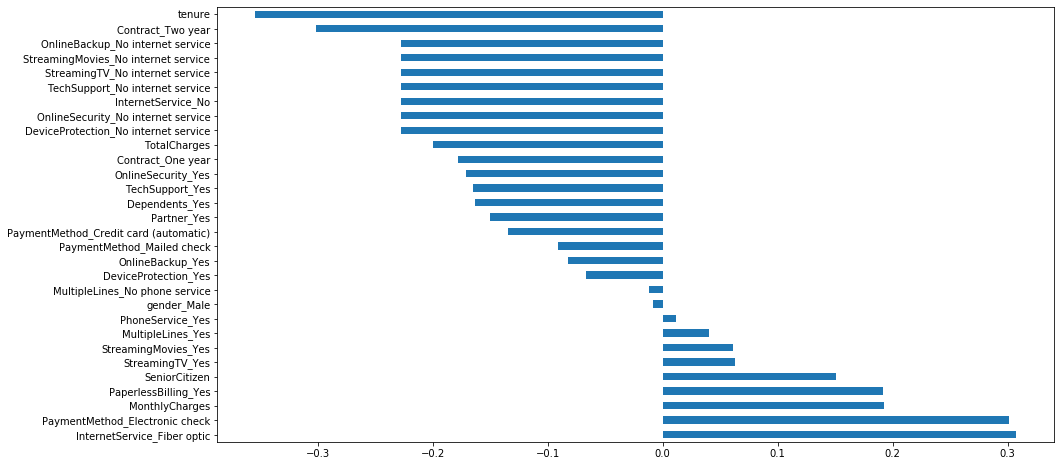

In [15]:
plt.figure(figsize=(15,8))
df_all.corr()['Churn'].sort_values(ascending = False).drop("Churn").plot(kind='barh')

In [16]:
X=df_all.drop("Churn", axis=1)
y=df_all["Churn"]

In [17]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=41, stratify=y)

### Logistic Regression

In [18]:
logreg_model=LogisticRegression().fit(X_train,y_train)
y_pred = logreg_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1388  161]
 [ 243  318]]
              precision    recall  f1-score   support

           0       0.85      0.90      0.87      1549
           1       0.66      0.57      0.61       561

    accuracy                           0.81      2110
   macro avg       0.76      0.73      0.74      2110
weighted avg       0.80      0.81      0.80      2110



### Random Forest

In [19]:
rf_model= RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1404  145]
 [ 290  271]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1549
           1       0.65      0.48      0.55       561

    accuracy                           0.79      2110
   macro avg       0.74      0.69      0.71      2110
weighted avg       0.78      0.79      0.78      2110



#### RF Tunning

In [22]:
rf = RandomForestClassifier()

In [20]:
rf_params = {"n_estimators":[50,100,300],
             "max_features":["log", "auto", "sqrt"],
             "min_samples_split":[2,4,6],
             "min_samples_leaf":[0.2,0.8,1,2]}

In [23]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1).fit(X_train, y_train)

In [24]:
rf_cv_model.best_params_

{'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 100}

In [25]:
rf_tuned = RandomForestClassifier(max_features = "sqrt",
                                  min_samples_leaf = 2,
                                  min_samples_split = 4,
                                  n_estimators = 100).fit(X_train, y_train)

In [26]:
y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1414  135]
 [ 276  285]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1549
           1       0.68      0.51      0.58       561

    accuracy                           0.81      2110
   macro avg       0.76      0.71      0.73      2110
weighted avg       0.79      0.81      0.80      2110



### XGBoost

In [27]:
xgb_model=XGBClassifier().fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1390  159]
 [ 274  287]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.64      0.51      0.57       561

    accuracy                           0.79      2110
   macro avg       0.74      0.70      0.72      2110
weighted avg       0.78      0.79      0.79      2110



#### XGBoost Tunning

In [28]:
xgb = XGBClassifier()

In [29]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [30]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 3,
                            n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   47.9s
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  1.3min finished


In [31]:
xgb_cv_model.best_params_

{'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.8}

In [32]:
xgb_tuned = XGBClassifier(learning_rate= 0.01,
                                max_depth= 5,
                                n_estimators= 300,
                                subsample= 0.8).fit(X_train, y_train)

In [33]:
y_pred=xgb_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1413  136]
 [ 266  295]]
              precision    recall  f1-score   support

           0       0.84      0.91      0.88      1549
           1       0.68      0.53      0.59       561

    accuracy                           0.81      2110
   macro avg       0.76      0.72      0.74      2110
weighted avg       0.80      0.81      0.80      2110



### Models with selected features

In [34]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [7]:
df_sel = df.drop(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'OnlineBackup',
                  'DeviceProtection', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'PaymentMethod'], axis=1)

In [9]:
df_sel.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tenure           7032 non-null   int64  
 1   InternetService  7032 non-null   object 
 2   OnlineSecurity   7032 non-null   object 
 3   TechSupport      7032 non-null   object 
 4   Contract         7032 non-null   object 
 5   MonthlyCharges   7032 non-null   float64
 6   TotalCharges     7032 non-null   float64
 7   Churn            7032 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 494.4+ KB


In [10]:
for i in df_sel.columns:
    print(i)
    print("-------------------------------")
    print(df[i].value_counts(dropna=False))

tenure
-------------------------------
1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64
InternetService
-------------------------------
Fiber optic    3096
DSL            2416
No             1520
Name: InternetService, dtype: int64
OnlineSecurity
-------------------------------
No                     3497
Yes                    2015
No internet service    1520
Name: OnlineSecurity, dtype: int64
TechSupport
-------------------------------
No                     3472
Yes                    2040
No internet service    1520
Name: TechSupport, dtype: int64
Contract
-------------------------------
Month-to-month    3875
Two year          1685
One year          1472
Name: Contract, dtype: int64
MonthlyCharges
-------------------------------
20.05     61
19.85     44
19.90     44
19.95     44
19.65     43
          ..
92.35      1
35.60      1
72.85      1
67.70      1
113.30     1
Name: Monthly

In [11]:
df_sel.describe()

,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441,0.265785
std,24.545260,30.085974,2266.771362,0.441782
min,1.000000,18.250000,18.800000,0.000000
25%,9.000000,35.587500,401.450000,0.000000
50%,29.000000,70.350000,1397.475000,0.000000
75%,55.000000,89.862500,3794.737500,1.000000
max,72.000000,118.750000,8684.800000,1.000000


In [9]:
df_sel.drop("Churn", axis=1).to_csv("Telco_df_sel.csv", index=False)

In [12]:
df_sel = pd.get_dummies(df_sel, drop_first=True)

In [14]:
df_sel.columns

Index(['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_Fiber optic', 'InternetService_No',
       'OnlineSecurity_No internet service', 'OnlineSecurity_Yes',
       'TechSupport_No internet service', 'TechSupport_Yes',
       'Contract_One year', 'Contract_Two year'],
      dtype='object')

In [15]:
X=df_sel.drop("Churn", axis=1)
y=df_sel["Churn"]
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.3, random_state=41, stratify=y)

In [16]:
X.to_csv("Telco_X.csv", index=False)

### Logreg

In [39]:
logreg_model=LogisticRegression().fit(X_train,y_train)
y_pred = logreg_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1397  152]
 [ 262  299]]
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1549
           1       0.66      0.53      0.59       561

    accuracy                           0.80      2110
   macro avg       0.75      0.72      0.73      2110
weighted avg       0.79      0.80      0.80      2110



### RF

In [40]:
rf_model= RandomForestClassifier().fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1367  182]
 [ 292  269]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      1549
           1       0.60      0.48      0.53       561

    accuracy                           0.78      2110
   macro avg       0.71      0.68      0.69      2110
weighted avg       0.76      0.78      0.77      2110



### XGBoost

In [41]:
xgb_model=XGBClassifier().fit(X_train,y_train)
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1378  171]
 [ 278  283]]
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1549
           1       0.62      0.50      0.56       561

    accuracy                           0.79      2110
   macro avg       0.73      0.70      0.71      2110
weighted avg       0.78      0.79      0.78      2110



### SMOTE

In [42]:
from imblearn.over_sampling import SMOTE

In [43]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (4922, 11)
Number transactions y_train dataset:  (4922,)
Number transactions X_test dataset:  (2110, 11)
Number transactions y_test dataset:  (2110,)


In [44]:
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))

print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=41)
X_train_new, y_train_new = sm.fit_sample(X_train, y_train)

print('After OverSampling, the shape of X_train_new: {}'.format(X_train_new.shape))
print('After OverSampling, the shape of y_train_new: {} \n'.format(y_train_new.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_new==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_new==0)))

Before OverSampling, the shape of X_train: (4922, 11)
Before OverSampling, the shape of y_train: (4922,) 

Before OverSampling, counts of label '1': 1308
Before OverSampling, counts of label '0': 3614 

After OverSampling, the shape of X_train_new: (7228, 11)
After OverSampling, the shape of y_train_new: (7228,) 

After OverSampling, counts of label '1': 3614
After OverSampling, counts of label '0': 3614


### Logistic Regression

In [45]:
logreg_model=LogisticRegression().fit(X_train_new,y_train_new)
y_pred = logreg_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1210  339]
 [ 146  415]]
              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1549
           1       0.55      0.74      0.63       561

    accuracy                           0.77      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.77      0.78      2110



#### Logistic Regression CV

In [46]:
logregcv=LogisticRegressionCV()

In [47]:
logregcv.fit(X_train_new, y_train_new)

LogisticRegressionCV()

In [48]:
y_pred=logregcv.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1192  357]
 [ 135  426]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83      1549
           1       0.54      0.76      0.63       561

    accuracy                           0.77      2110
   macro avg       0.72      0.76      0.73      2110
weighted avg       0.80      0.77      0.78      2110



### Random Forest

In [49]:
rf_model= RandomForestClassifier().fit(X_train_new, y_train_new)
y_pred = rf_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1271  278]
 [ 217  344]]
              precision    recall  f1-score   support

           0       0.85      0.82      0.84      1549
           1       0.55      0.61      0.58       561

    accuracy                           0.77      2110
   macro avg       0.70      0.72      0.71      2110
weighted avg       0.77      0.77      0.77      2110



#### RF Tunning

In [51]:
rf=RandomForestClassifier()

In [52]:
rf_params = {"n_estimators":[50,100,300],
             "max_features":["log", "auto", "sqrt"],
             "min_samples_split":[2,4,6],
             "min_samples_leaf":[0.2,0.8,1,2]}

In [53]:
rf_cv_model = GridSearchCV(rf, rf_params, cv = 5, n_jobs = -1).fit(X_train_new, y_train_new)

In [54]:
rf_cv_model.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 4,
 'n_estimators': 300}

In [55]:
rf_tuned = RandomForestClassifier(max_features = "auto",
                                  min_samples_leaf = 2,
                                  min_samples_split = 4,
                                  n_estimators = 300).fit(X_train_new, y_train_new)

In [56]:
y_pred = rf_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1252  297]
 [ 194  367]]
              precision    recall  f1-score   support

           0       0.87      0.81      0.84      1549
           1       0.55      0.65      0.60       561

    accuracy                           0.77      2110
   macro avg       0.71      0.73      0.72      2110
weighted avg       0.78      0.77      0.77      2110



### XGBoost

In [57]:
xgb_model=XGBClassifier().fit(X_train_new,y_train_new)
y_pred = xgb_model.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1226  323]
 [ 191  370]]
              precision    recall  f1-score   support

           0       0.87      0.79      0.83      1549
           1       0.53      0.66      0.59       561

    accuracy                           0.76      2110
   macro avg       0.70      0.73      0.71      2110
weighted avg       0.78      0.76      0.76      2110



### XGBoost Tunning

In [58]:
xgb=XGBClassifier()

In [59]:
xgb_params = {"n_estimators": [50, 100, 300],
             "subsample":[0.5,0.8,1],
             "max_depth":[3,5,7],
             "learning_rate":[0.1,0.01,0.3]}

In [60]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv = 5,
                            n_jobs = -1, verbose = 2).fit(X_train_new, y_train_new)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   11.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   57.2s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  2.2min
[Parallel(n_jobs=-1)]: Done 405 out of 405 | elapsed:  2.6min finished


In [61]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}

In [62]:
xgb_tuned = XGBClassifier(learning_rate= 0.1,
                                max_depth= 7,
                                n_estimators= 300,
                                subsample= 0.8).fit(X_train_new, y_train_new)

In [63]:
y_pred=xgb_tuned.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1245  304]
 [ 208  353]]
              precision    recall  f1-score   support

           0       0.86      0.80      0.83      1549
           1       0.54      0.63      0.58       561

    accuracy                           0.76      2110
   macro avg       0.70      0.72      0.70      2110
weighted avg       0.77      0.76      0.76      2110



### Support Vector Classifier

In [64]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler

In [65]:
sc = StandardScaler()
X_train_s = sc.fit_transform(X_train_new)
X_test_s = sc.transform(X_test)
svc_model = SVC().fit(X_train_s, y_train_new)
y_pred = svc_model.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1234  315]
 [ 178  383]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1549
           1       0.55      0.68      0.61       561

    accuracy                           0.77      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.77      0.77      2110



### KNN

In [66]:
knn_model = KNeighborsClassifier().fit(X_train_s, y_train_new)
y_pred = knn_model.predict(X_test_s)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1237  312]
 [ 182  379]]
              precision    recall  f1-score   support

           0       0.87      0.80      0.83      1549
           1       0.55      0.68      0.61       561

    accuracy                           0.77      2110
   macro avg       0.71      0.74      0.72      2110
weighted avg       0.79      0.77      0.77      2110



### saving model

In [69]:
sm = SMOTE(random_state=41)
X_new, y_new = sm.fit_sample(X, y)

In [70]:
logreg_model=LogisticRegression().fit(X_new,y_new)

In [71]:
import pickle
pickle.dump(logreg_model, open("telco_model", 'wb'))